### 🐄 **Livestock Population: Data Cleaning and Initial Exploration**

- **This notebook loads the dataset `2_Численность.xlsx`, combines multiple sheets, removes empty rows, and prepares the data for further analysis and visualization.**  
- Fully empty rows are removed  
- The structure of livestock population data is explored before cleaning headers and formatting values


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import pandas as pd

# 📂 Загрузка Excel-файла, начиная с 5-й строки (header=4)
df = pd.read_excel("data/2_Численность.xlsx", sheet_name="2.", header=4)

# 🔍 Удаляем строки, где нет названия категории (первая колонка пустая)
df = df[df[df.columns[0]].notna()]

# ✏️ Переименовываем первую колонку
df = df.rename(columns={df.columns[0]: "Категория"})

# 📥 Оставляем только 3 важные колонки: Категория, 2024, 2025
df_filtered = df[["Категория", df.columns[1], df.columns[2]]].copy()

# 🔢 Преобразуем значения в числовой формат (если возможно)
df_filtered[df.columns[1]] = pd.to_numeric(df_filtered[df.columns[1]], errors='coerce')
df_filtered[df.columns[2]] = pd.to_numeric(df_filtered[df.columns[2]], errors='coerce')

# 🧹 Удаляем строки, где обе ячейки пустые
df_filtered = df_filtered.dropna(subset=[df.columns[1], df.columns[2]], how='all')

# 🔄 Сброс индексов
df_filtered = df_filtered.reset_index(drop=True)

# 💾 Сохраняем результат
df_filtered.to_excel("data/2_Численность_cleaned.xlsx", index=False)
print("✅ Готово! Сохранено в: data/2_Численность_cleaned.xlsx")


✅ Готово! Сохранено в: data/2_Численность_cleaned.xlsx


C:\Users\aruzh\AppData\Local\Temp\ipykernel_11740\4051125828.py:60: UserWarning: Glyph 128004 (\N{COW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\aruzh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128004 (\N{COW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


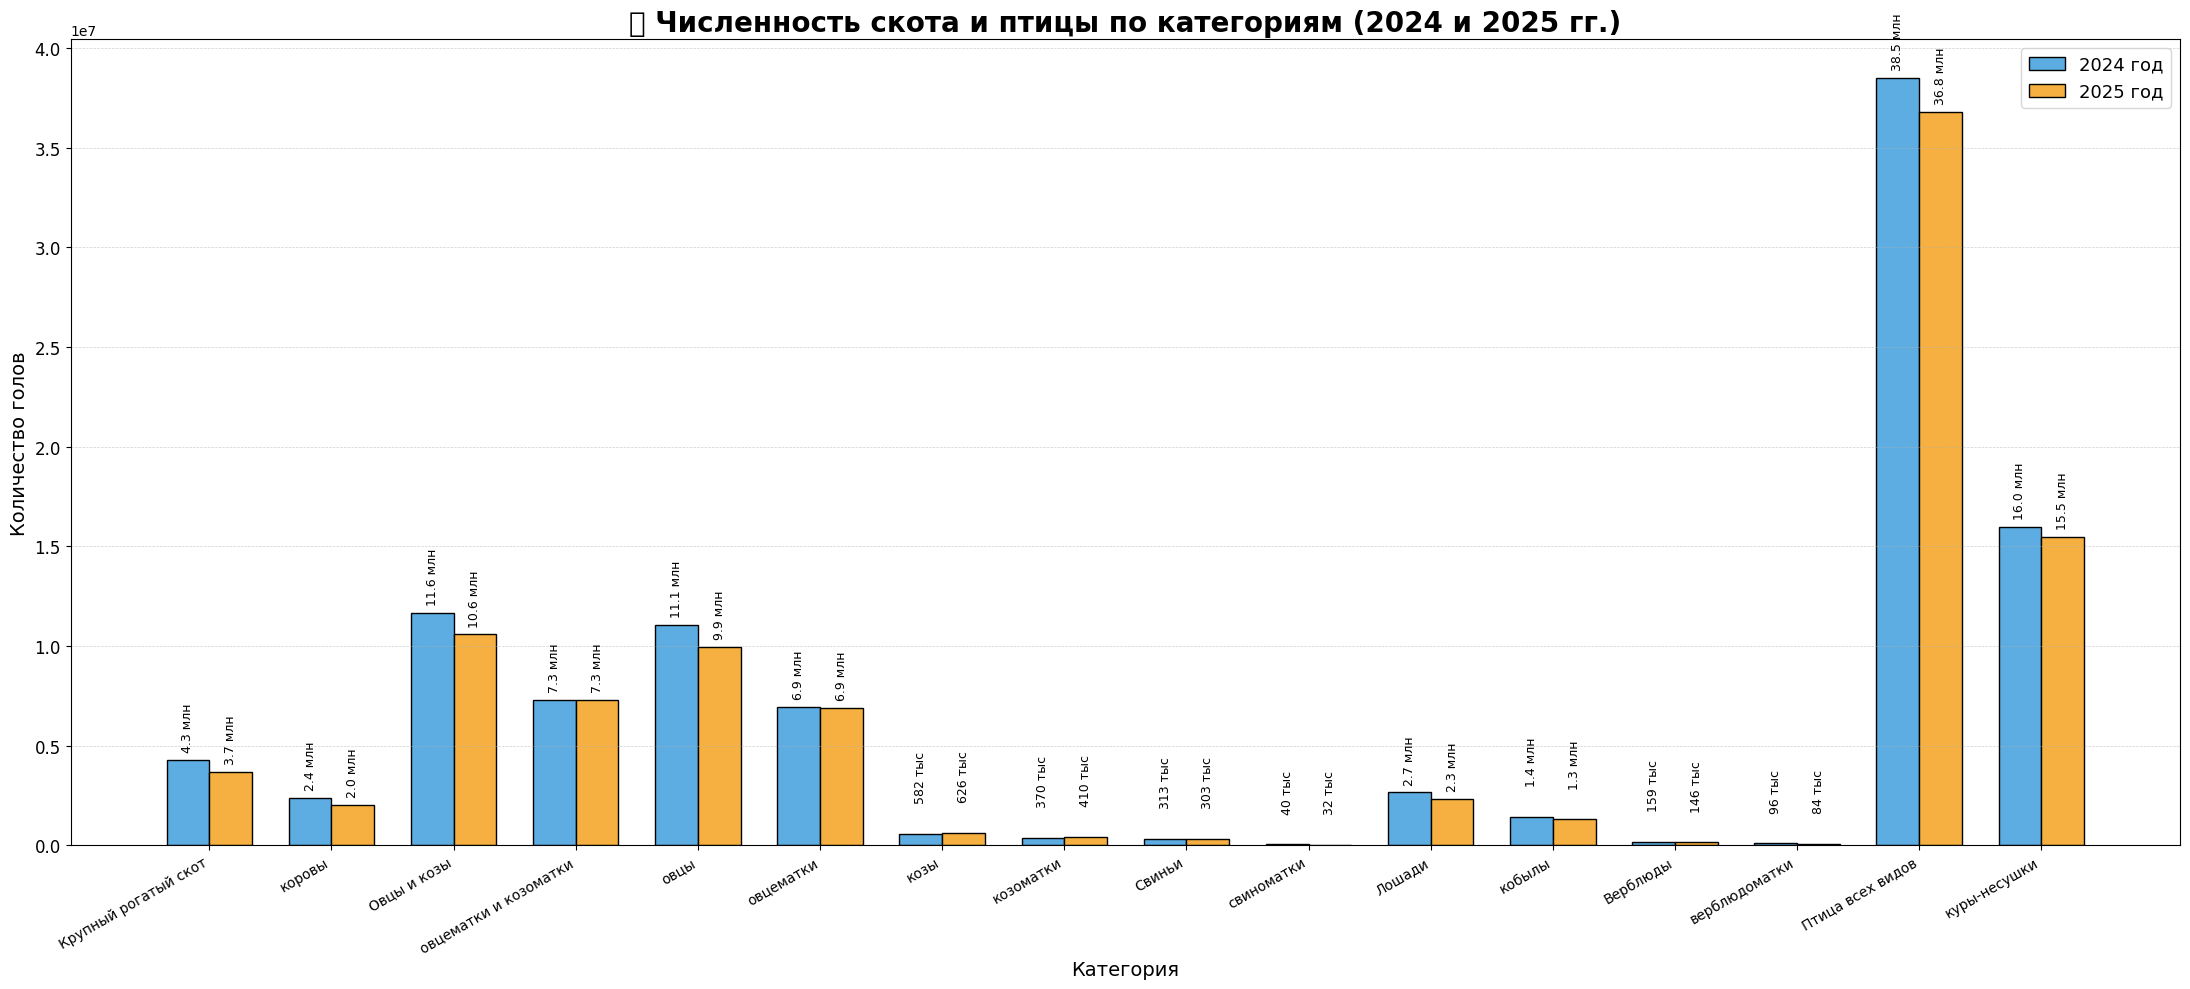

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
df = pd.read_excel("data/2_Численность_cleaned.xlsx")

# Укороченные категории
df["Категория"] = df["Категория"].str.replace("из них", "").str.strip()

# Подготовка
categories = df["Категория"]
values_2024 = df[df.columns[1]]
values_2025 = df[df.columns[2]]
x = np.arange(len(categories))
bar_width = 0.35

# 🎨 Построение графика
plt.figure(figsize=(22, 10))
bars_2024 = plt.bar(x - bar_width/2, values_2024, bar_width, label="2024 год", color="#5DADE2", edgecolor="black")
bars_2025 = plt.bar(x + bar_width/2, values_2025, bar_width, label="2025 год", color="#F5B041", edgecolor="black")

# 🏷️ Заголовки и оформление
plt.title("🐄 Численность скота и птицы по категориям (2024 и 2025 гг.)", fontsize=20, weight='bold')
plt.xlabel("Категория", fontsize=14)
plt.ylabel("Количество голов", fontsize=14)
plt.xticks(x, categories, rotation=30, ha="right", fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(fontsize=13)

# Формат чисел
def short_number(n):
    if n >= 1_000_000:
        return f"{n/1_000_000:.1f} млн"
    elif n >= 1_000:
        return f"{n/1_000:.0f} тыс"
    else:
        return f"{n:.0f}"

# Подписи на столбиках
max_y = max(values_2024.max(), values_2025.max())
for bars in [bars_2024, bars_2025]:
    for bar in bars:
        height = bar.get_height()
        if not pd.isna(height):
            offset = max_y * 0.01
            position = height + offset if height > max_y * 0.05 else height + offset * 4
            plt.text(
                bar.get_x() + bar.get_width()/2,
                position,
                short_number(height),
                ha='center',
                va='bottom',
                fontsize=9,
                rotation=90,
                color="black"
            )

plt.tight_layout()
plt.show()
